group           9323
discussion      6447
document        5721
notification    4499
profile_view    3308
profile_edit    1546
event           1366
search           744
connection       403
registration     320
announcement     282
status           278
Name: url_type, dtype: int64


,discussion_urls,group_urls,announcement_urls,document_urls,profile_view_urls,event_urls,notification_urls,profile_edit_urls,registration_urls,search_urls,status_urls,connection_urls
1,0.12,0.26,0.01,0.10,0.04,0.05,0.40,0.00,0.00,0.01,0.0,0.00
2,0.43,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.0,0.00
3,0.03,0.08,0.00,0.02,0.48,0.05,0.34,0.00,0.00,0.00,0.0,0.00
21,0.00,0.38,0.02,0.10,0.00,0.38,0.08,0.02,0.00,0.02,0.0,0.00
24,0.00,0.44,0.00,0.00,0.52,0.00,0.04,0.00,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
182245,0.02,0.16,0.00,0.02,0.35,0.04,0.04,0.35,0.02,0.00,0.0,0.02
182250,0.00,0.23,0.00,0.04,0.31,0.00,0.08,0.31,0.04,0.00,0.0,0.00
182274,0.00,0.60,0.00,0.20,0.00,0.00,0.10,0.00,0.10,0.00,0.0,0.00
182288,0.00,0.75,0.00,0.00,0.00,0.00,0.08,0.00,0.17,0.00,0.0,0.00


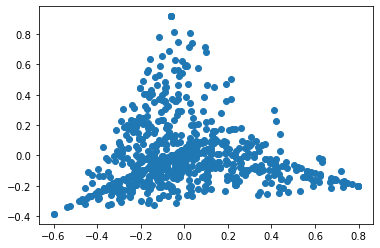

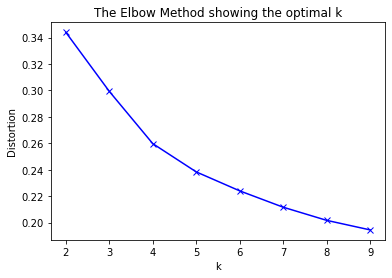

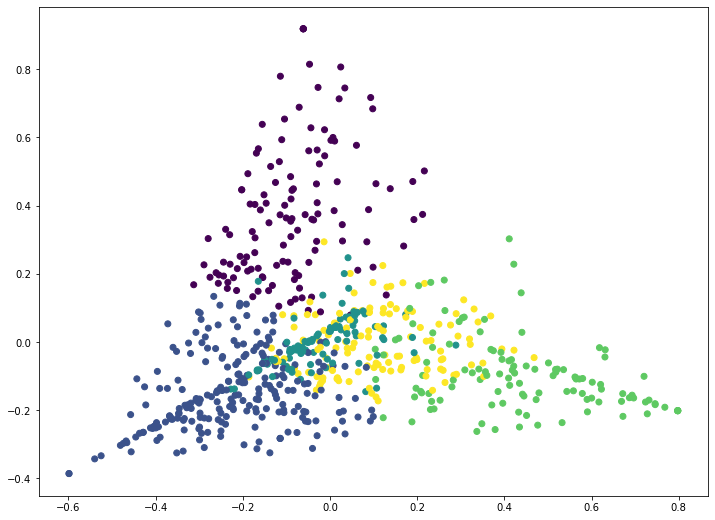

Cluster 1
document_urls
50.52 %
group_urls
22.48 %
discussion_urls
8.01 %
notification_urls
8.01 %
profile_view_urls
2.1 %
profile_edit_urls
1.0 %


Cluster 2
group_urls
54.35 %
discussion_urls
11.05 %
notification_urls
8.73 %
document_urls
6.48 %
profile_view_urls
4.71 %
profile_edit_urls
3.09 %


Cluster 3
profile_view_urls
29.95 %
profile_edit_urls
29.1 %
group_urls
16.35 %
notification_urls
7.44 %
discussion_urls
4.84 %
document_urls
2.01 %


Cluster 4
discussion_urls
61.29 %
group_urls
10.98 %
notification_urls
8.24 %
document_urls
5.29 %
profile_view_urls
4.74 %
profile_edit_urls
1.43 %


Cluster 5
notification_urls
31.28 %
discussion_urls
19.59 %
group_urls
17.53 %
profile_view_urls
7.33 %
document_urls
5.3 %
profile_edit_urls
3.19 %




In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans,MeanShift,DBSCAN
from sklearn import preprocessing ,  neighbors,svm
import pandas as pd
import sklearn
import time
from sklearn.model_selection import train_test_split
from pandas import ExcelWriter
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from IPython.display import display
df = pd.read_csv("filteringdata1month.csv")

del(df['Unnamed: 0'])

df['url_split']=df.url.str.split('/').str.get(0)
df['url_split']=df.url_split.str.split('?').str.get(0)

df1= df[~((df['object_type']==2.0) & (df['url_split'].isin(['event-detail','discussions-about', 'announcement-detail', 'document-reader', 'discussions-reply', 'status']))) ]
        
              

gp = df1.groupby('user_id').aggregate(np.count_nonzero)
tf = gp[gp.created_time > 9].reset_index()
tf=tf['user_id'].tolist()
df2=df1[(df1['user_id'].isin(tf))]



def get_url_type(url_sub_type):
   url_types = {}
   
   url_types['discussion'] = [
       'discussions-about', 'group-discussions', 'discussions', 'discussions-reply',
       'createDiscussions'
   ]
   url_types['group'] = [
       'group-home', 'myGroups', 'group-about', 'group-news', 'pendingGroups', 'group-related',
       'discoverGroups', 'group-create-request', 'group-analytics', 'createGroupStep1',
       'createGroupStep2', 'createGroupStep3', 'createGroupStep4', 'group-external-drive',
       'group-template'
   ]
   url_types['announcement'] = [
       'announcement-detail', 'group-announcement', 'announcement-reply', 'edit-announcement'
   ]
   url_types['document'] = [
       'document-reader', 'group-library', 'document-detail', 'library', 'reviewDocs','document-uploads'
   ]
   url_types['profile_view'] = ['profile', 'group-admin-members']
   url_types['event'] = ['event-detail', 'group-events', 'events', 'event-entry']
   url_types['notification'] = ['notification', 'content-notification', 'group-notification','main-home', 'site-home']
   url_types['profile_edit'] = ['profile-edit', 'email-notification', 'manageAccount']
   url_types['registration'] = ['betaRegistration']
   url_types['search'] = ['search']
   url_types['status'] = ['status', 'create-status', 'status-reply']
   url_types['connection'] = ['connections', 'pendingConnections']
 
   
   for url_type, sub_types in url_types.items():
       if url_sub_type in sub_types:
           return url_type

pd.options.mode.chained_assignment = None


df2['url_type'] = df2['url_split'].apply(get_url_type)
df2 = df2[~pd.isna(df2['url_type'])]



print(df2['url_type'].value_counts())


user_df_columns = [
    'discussion_urls', 'group_urls', 'announcement_urls', 'document_urls',
    'profile_view_urls', 'event_urls', 'notification_urls', 'profile_edit_urls', 'registration_urls',
    'search_urls', 'status_urls', 'connection_urls', 
]

user_df_dict = {}
for index, row in df2.iterrows():
    if row['user_id'] not in user_df_dict:
        user_df_dict[row['user_id']] = [0]*len(user_df_columns)
    
    column_name = row['url_type'] + '_urls'
    idx = user_df_columns.index(column_name)
    user_df_dict[row['user_id']][idx] += 1
    
user_df = pd.DataFrame.from_dict(user_df_dict, orient='index', columns=user_df_columns)


user_scaled_df = user_df.apply(lambda x: round(x/x.sum(), 2), axis=1)


display(user_scaled_df)

clustering_columns = [
    'discussion_urls', 'group_urls', 'document_urls', 'profile_view_urls', 'notification_urls',
    'profile_edit_urls'
]

user_scaled_df_2 = user_scaled_df[clustering_columns]

pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(user_scaled_df_2[clustering_columns]))
plt.scatter(transformed[0], transformed[1])
plt.show()


distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=2000, random_state=100).fit(user_scaled_df_2)
    cluster_labels = kmeans.fit_predict(user_scaled_df_2)
    silhouette_avg = round(silhouette_score(user_scaled_df_2, cluster_labels), 3)
##    print('%s: %s' % (k, silhouette_avg))
    distortions.append(sum(np.min(cdist(user_scaled_df_2, kmeans.cluster_centers_, 'euclidean'), axis=1)) / user_scaled_df_2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=50, max_iter=2000, random_state=100).fit(user_scaled_df_2)
labels = kmeans.labels_
user_scaled_df_2['label'] = labels
plt.figure(figsize=(12, 9))
plt.scatter(transformed[0], transformed[1], c=labels)

plt.show()


##for c in clustering_columns:
##    print(c)
##    for l in sorted(user_scaled_df_2['label'].unique()):
##        filtered_df = user_scaled_df_2[user_scaled_df_2['label'] == l]
##        print('Cluster %s: %s' % (l+1, filtered_df[c].mean()))


for l in sorted(user_scaled_df_2['label'].unique()):
    print('Cluster %s' % str(l+1))
    filtered_df = user_scaled_df_2[user_scaled_df_2['label'] == l]
    
    cluster_url_percentages = []
    for c in clustering_columns:
        cluster_url_percentages.append((c, filtered_df[c].mean()))
    
    for c, percentage in sorted(cluster_url_percentages, key=lambda x: x[1], reverse=True):
        print(c)
        print(round(percentage*100, 2),'%')
    
    print('\n')
